## Second Assignment

Lorenzo Domenichetti 2011653


due 25-04

In [1]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



### Exercise 1

• A set of measurements have been performed on the concentration of a contaminant
in tap water. The following tables reports a set of values (x), with the  corresponding probabilities given by the two methods (p1 and p2).

• Evaluate the expected values, $E[X]$, and the variance, $Var(X)$, for both methods


In [2]:
x  <- c(15.58, 15.9, 16, 16.1, 16.2)
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14) 
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)

message("The mean of x for the first method: ",sum(x*p1))
message("The mean of x for the second method: ",sum(x*p2))

message("The variance of x for the first method: ",sum(x^2*p1)-sum(x*p1)^2)
message("The variance of x for the second method: ",sum(x^2*p2)-sum(x*p2)^2)

The mean of x for the first method: 15.959

The mean of x for the second method: 15.9622

The variance of x for the first method: 0.0339790000000164

The variance of x for the second method: 0.0281671599999811



### Exercise 2

The waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an exponential pdf with rate 1/30.

A) Simulate the waiting time for 50 people at the doctor’s office and plot the relative
histogram


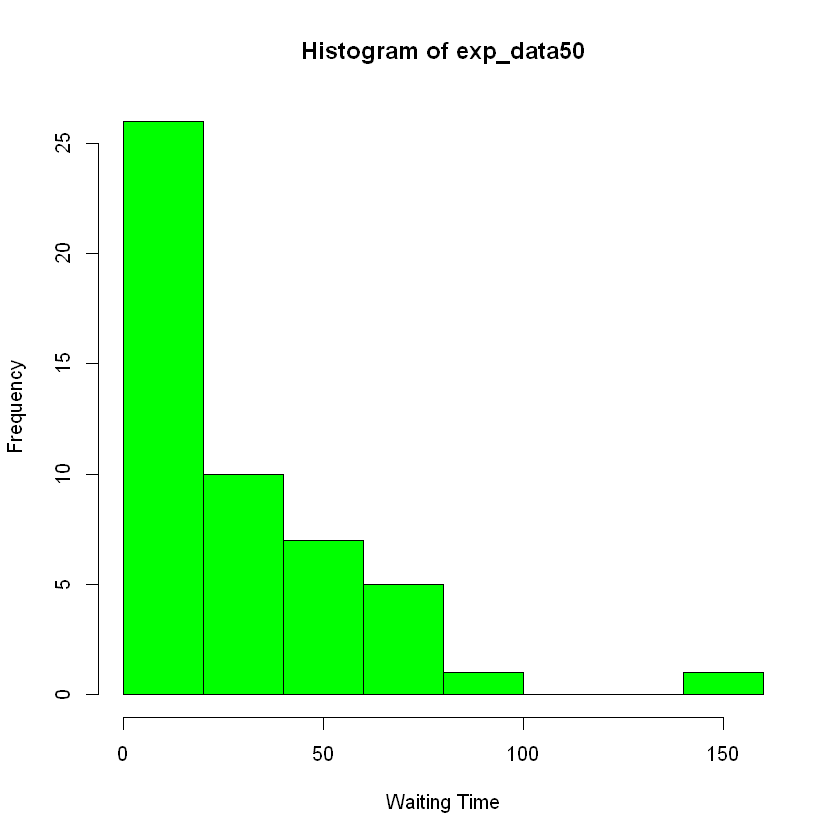

In [3]:
rate <- 1.0/30
exp_data50 <- rexp(50, rate)
hist(exp_data50, c = "green", xlab = "Waiting Time")

B) What is the probability that a person will wait for less than 10 minutes ?

In general, the 1-prob. of waiting more than 10 minutes. 

It can be seen also as the cdf for x = 10, as this represent the integral of the distribution up to 10 minutes.

In [4]:
#P (X<10) = 1-e^(-10*lambda)
message("First try:  1-exp ", 1-exp(-10.0*rate))
message("Second try: CDF   ", pexp(10, rate = 1/30))

First try:  1-exp 0.283468689426211

Second try: CDF   0.283468689426211



C) Evaluate the average waiting time from the simulated data and compare it with
the expected value (calculated from theory and by manipulating the probability
distributions using R)

The distribution has rate 1/30, and the expected value is $(\frac{1}{30})^{-1}$, so 30 from _theoretical_ calculations. 

In [5]:
message("The theoretical average is 30, the simulated one: ", mean(exp_data50))

The theoretical average is 30, the simulated one: 28.1152015784451



D) What is the probability for waiting more than one hour before being received?

Same structure as the previous case, but reversed - P (X>60)  = 1-P(X<60)


In [6]:
message("First try:  1-exp ", exp(-60.0/30))
message("Second try: CDF   ", 1-pexp(60, 1/30))

First try:  1-exp 0.135335283236613

Second try: CDF   0.135335283236613



### Exercise 3

•  Let’s suppose that on a book, on average, there is one typo error every three pages.
If the number of errors follows a Poisson distribution, plot the pdf and cdf, and
calculate the probability that there is at least one error on a specific page of the
book

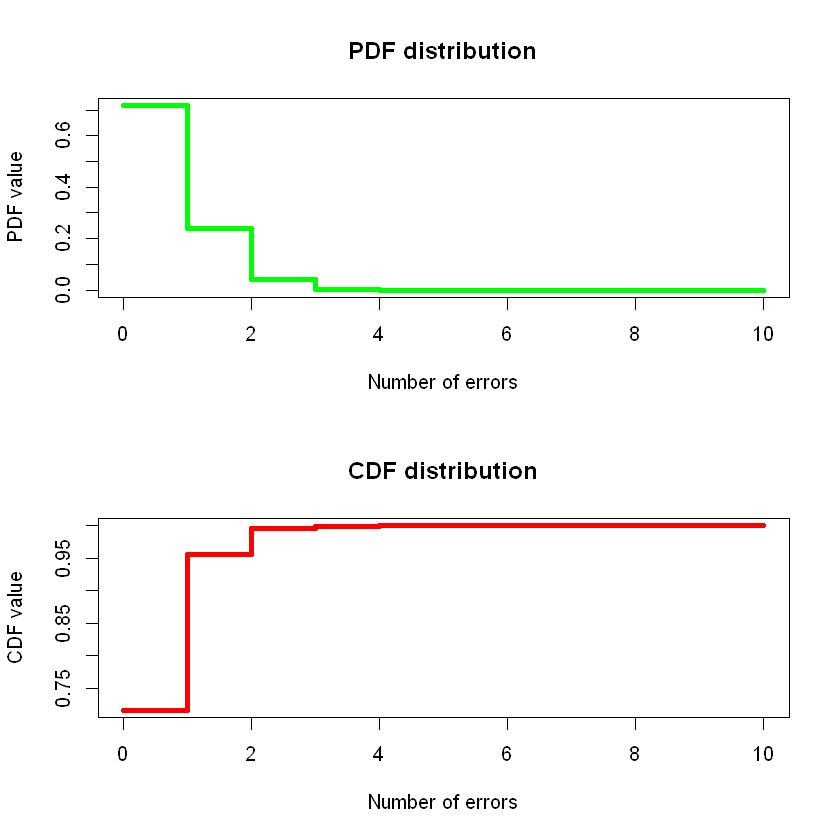

In [7]:
y_dpois <- dpois(0:10, 1.0/3)
y_ppois <- ppois(0:10, lambda = 1.0/3)
par(mfrow  = c(2,1))
plot(0:10, y_dpois, lwd = 4, col = 'green', t = 's', main = "PDF distribution", xlab = "Number of errors", ylab = "PDF value")
plot(0:10, y_ppois, lwd = 4, col = 'red', t = 's', main = "CDF distribution", xlab = "Number of errors", ylab = "CDF value")

Calculate the probability that there is at least one error on a specific page of the
book

1-prob. that no error occurs. For the probability of no error, we can explot the dpois function. 

In [8]:
message("Probability of at least one error on a single page: ", 1-dpois(0, 1.0/3))

Probability of at least one error on a single page: 0.283468689426211



### Exercise 4

• We randomly draw cards from a deck of 52 cards, with replacement, until one ace is
drawn. Calculate the probability that at least 10 draws are needed.

Prob of one ace drawn : 4/52 = 1/13
So, in order to get at least 10 draws, we can compute the probability of having less than 10 draws and finally compute the complementary.

So: 1-P(1)-P(2)-P(3)...-P(9),  where p(i) = p_ace * (p_non_ace)$^{i-1}$

Or.. we can simply use pgeom.


In [9]:
prob = 1.0/13

nprob = 1-prob

sum = 0
for (i in 1:10){
    sum <- sum + (prob)*(nprob)^(i-1)
}
res <- 1-sum
res

message("From the direct calculation: ", res)
message(".. And from the R one:       ", 1-pgeom(9, 1.0/13))

[1] 0.4491371

From the direct calculation: 0.449137107141863

.. And from the R one:       0.449137107141863



### Exercise 5

The time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form

\begin{equation}
f(t) = 
    \begin{cases}
     c(t − 1)(2 − t)   \,\,\,\,\,  1 < t < 2 \\
      0 \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, otherwise
    \end{cases}\,
\end{equation}

where t is the time in hours.

a) Using the integrate() R function, determine the constant c (and verify it analytically)


In [10]:
f <- function(t) (t-1)*(2-t)
intval <- integrate(f, lower = 1, upper = 2)

message("The value of the integral from 1 to 2: ", intval$value, " Its inverse: ", 1/intval$value)

normf <- function(t) (6*(t-1)*(2-t))
cdf <- function(x){
    -2*x^3+9*x^2-12*x
}

n_intval <- integrate(normf, lower = 1, upper = 2)
message("The integral after normalization: ",  n_intval$value)

The value of the integral from 1 to 2: 0.166666666666667 Its inverse: 6

The integral after normalization: 1



b) Write the set of four R functions and plot the pdf and cdf, respectively

In [11]:
dprob <- function(x){
    if (x<=2 & x>=1){
        normf(x)
    }
    else {
        message("Error. Insert value in the [1,2] interval")
    }
}

pprob <- function(x){
    if (x<=2 & x>=1){
        cdf(x)-cdf(1)
    }
    else if (x<1){
        0
    }
    else if (x>2){
        1
    }
}

qprob <- function(q){
  uniroot(function(x){pprob(x) - q},lower = 1, upper = 2)$root
}

rprob <- function(n){
    x <- c()
    to_do = TRUE
    i = 0
    while(i<n){ 
        while(to_do){
            uni <- runif(1,1,2)
            sel <- runif(1,0,1.5)
            if(dprob(uni)>sel){
                x <- c(x,uni)
                to_do = FALSE
            }
        }
        to_do = TRUE
        i = i+1
    }
    x   
}

Warning message in if (x <= 2 & x >= 1) {:
"la condizione la lunghezza > 1 e solo il promo elemento verrà utilizzato"
Warning message in if (x <= 2 & x >= 1) {:
"la condizione la lunghezza > 1 e solo il promo elemento verrà utilizzato"


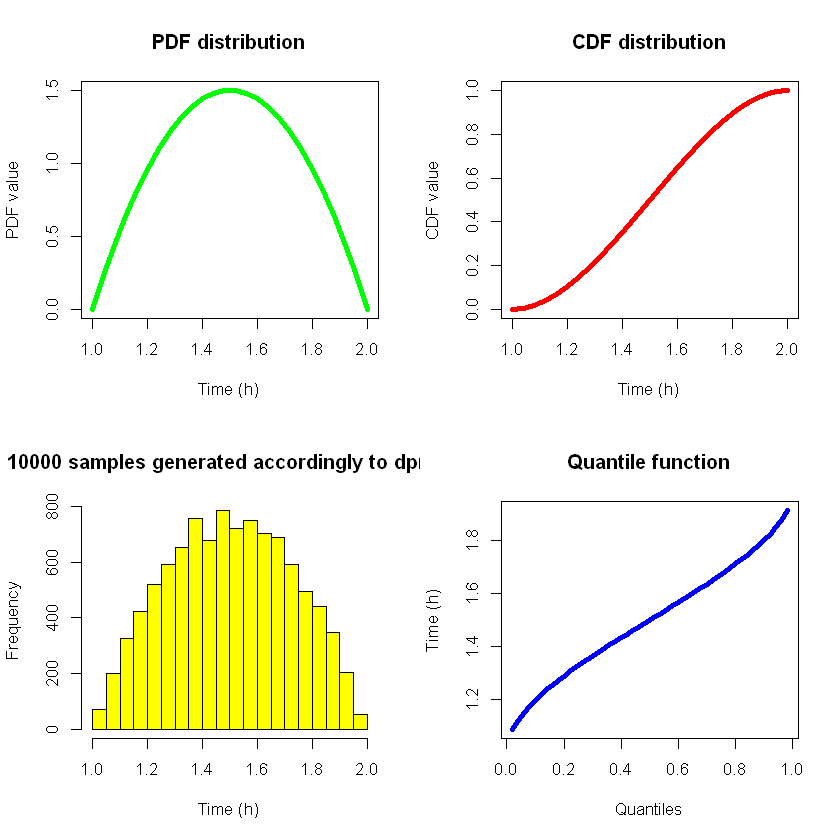

In [12]:
a <- (25:50)/25

axes <- (1:49)/50

res <- c()
for (i in axes){
    res <- c(res, qprob(i))
}

par(mfrow = c(2, 2))

plot(a, dprob(a), t = "l", col = "green", lwd = 4, xlab = "Time (h)", ylab = "PDF value", main = "PDF distribution")

plot(a, pprob(a), t = "l", col = "red", lwd = 4, xlab = "Time (h)", ylab = "CDF value", main = "CDF distribution")

hist(rprob(10000), xlab = "Time (h)", main = "10000 samples generated accordingly to dprob", c = "yellow")



plot(axes, res, t = "l", lwd = 4, ylab = "Time (h)", xlab = "Quantiles", main = "Quantile function", col = "blue")

c) Evaluate the probability that the student will finish the aptitude test in more than
75 minutes. And that it will take 90 and 120 minutes and between 90 and 120.

In [13]:
#prob for a student to take more than 75 minute. 
#The prob is given integrating from 75/120 to 120. 
message("Prob fot the test to take more than 75 min - numerical solution ", integrate(dprob, lower = 75.0/60, upper = 2)$value)
message("Prob fot the test to take more than 75 min - cdf solution ", 1-pprob(75/60))

#prob to take exactly a minute is zero for each of the two cases. 
#The integral basically has to be computed among the same two extremes, 
#so the result is basically zero for both 95 and 120 minutes
#Prob from 90 to 120 - equal to take more than 90 min
message("Prob fot the test to take more than 90 min (distribution's half point) - cdf solution ", 1-pprob(90/60))


Warning message in if (x <= 2 & x >= 1) {:
"la condizione la lunghezza > 1 e solo il promo elemento verrà utilizzato"
Prob fot the test to take more than 75 min - numerical solution 0.84375

Prob fot the test to take more than 75 min - cdf solution 0.84375

Prob fot the test to take more than 90 min (distribution's half point) - cdf solution 0.5



### Exercise 6

• the lifetime of tires sold by an used tires shop is 104 x km, where x is a random
variable following the distribution function

\begin{equation}
f(x) = 
    \begin{cases}
     2/x^2   \,\,\,\,\,  1 < x < 2 \\
      0 \,\,\,\,\,\,\,\,\,\,\,\, otherwise
    \end{cases}\,.
\end{equation}

a) write the set of four R functions and plot the pdf and cdf, respectively

In [14]:
#Check the integral to be normalized
integrate(function(x) 2/x^2, 1,2)

1 with absolute error < 1.1e-14

In [15]:
dprob2 <- function(x){
    if (x<=2 & x>=1){
        2/x^2
    }
    else {
        message("Error. Insert value in the [1,2] interval")
    }
}

pprob2 <- function(x){
    if (x<=2 & x>=1){
        2-2/x
    }
    else if (x<1){
        0
    }
    else if (x>2){
        1
    }
}

qprob2 <- function(q){
  uniroot(function(x){pprob2(x) - q},lower = 1, upper = 2)$root
}

rprob2 <- function(n){
    x <- c()
    to_do = TRUE
    i = 0
    while(i<n){ 
        while(to_do){
            uni <- runif(1,1,2)
            sel <- runif(1,0,1.5)
            if(dprob2(uni)>sel){
                x <- c(x,uni)
                to_do = FALSE
            }
        }
        to_do = TRUE
        i = i+1
    }
    x   
}

Warning message in if (x <= 2 & x >= 1) {:
"la condizione la lunghezza > 1 e solo il promo elemento verrà utilizzato"
Warning message in if (x <= 2 & x >= 1) {:
"la condizione la lunghezza > 1 e solo il promo elemento verrà utilizzato"


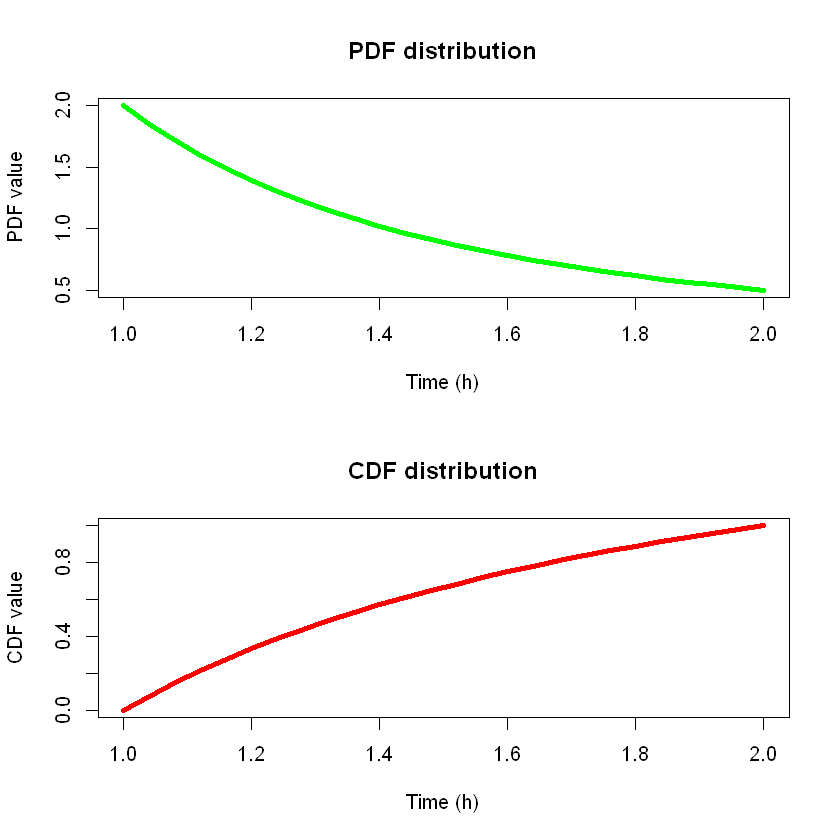

In [16]:
a <- (25:50)/25

par(mfrow = c(2, 1))

plot(a, dprob2(a), t = "l", col = "green", lwd = 4, xlab = "Time (h)", ylab = "PDF value", main = "PDF distribution")

plot(a, pprob2(a), t = "l", col = "red", lwd = 4, xlab = "Time (h)", ylab = "CDF value", main = "CDF distribution")

b) Determine the probability that tires will last less than 15000 km


In [17]:
#prob that tires will last less than 1.5 *10^4 km => area between 1 and 1.5, or cdf at 1.5 (of course)
message("\nProb for tires to last more than 1.5*10^4 km - numerical integration: ", integrate(dprob2, 1,1.5)$value)
message("With cdf: ", pprob2(1.5))

Warning message in if (x <= 2 & x >= 1) {:
"la condizione la lunghezza > 1 e solo il promo elemento verrà utilizzato"

Prob for tires to last more than 1.5*10^4 km - numerical integration: 0.666666666666667

With cdf: 0.666666666666667




c) Sample 3000 random variables from the distribution and determine the mean value and the variance, using the expression $Var(x) = E[x^2]-E[x]^2 $

In [18]:
sample <- rprob2(3000)
mean_s <- mean(sample)
variance <- mean((sample-mean_s)^2)

message("The mean for a tire : ", mean_s, " *10^4 km")
message("The variance for a tire: ", variance, " *10^4km")


#theoretical prediction
message("The predicted mean for a tire : ", integrate(function(x) 2/x, 1,2)$value, " *10^4 km")
message("The predicted variance for a tire : ", 2 - (integrate(function(x) 2/x, 1,2)$value)^2, " *10^4 km")

The mean for a tire : 1.40381520873044 *10^4 km

The variance for a tire: 0.0765859893227859 *10^4km

The predicted mean for a tire : 1.38629436111989 *10^4 km

The predicted variance for a tire : 0.0781879443271938 *10^4 km

